In [90]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%run ..\Functions.ipynb

# Collocation dekadal data

In [91]:
ref_folder = r'D:\Doctorate\Bich_PhD\research\3_WaPOR\Notebooks\0_insitu\Data\OpenET'
rs_folder = r'D:\Doctorate\Bich_PhD\research\3_WaPOR\Notebooks\0_RS-data\Data\WaPOR'
rs_name = 'WaPOR_v3_L1_AETI'
ref_name = 'OpenET'

In [92]:
# sites with OpenET benchmark data from 2018
stations = ['ALARC2_Smith6',
 'Almond_High',
 'Almond_Low',
 'Almond_Med',
 'BAR012',
 'Ellendale',
 'JPL1_JV114',
 'JPL1_Smith5',
 'manilacotton',
 'RIP760',
 'S2',
 'SLM001',
 'stonevillesoy',
 'UA1_HartFarm',
 'UA1_JV187',
 'UA1_KN18',
 'UA2_JV330',
 'UA2_KN20',
 'UA3_JV108',
 'UA3_KN15',
 'US-ARM',
 'US-Bi1',
 'US-Bi2',
 'US-CMW',
 'US-GLE',
 'US-Hn2',
 'US-Hn3',
 'US-IB1',
 'US-IB2',
 'US-Jo2',
 'US-KM4',
 'US-Me2',
 'US-Me6',
 'US-MMS',
 'US-NC2',
 'US-NC3',
 'US-NC4',
 'US-Ne1',
 'US-Ne2',
 'US-Ne3',
 'US-NR1',
 'US-OF4',
 'US-OF6',
 'US-Ro4',
 'US-Ro5',
 'US-Ro6',
 'US-Rwf',
 'US-Rws',
 'US-Sne',
 'US-SRG',
 'US-SRM',
 'US-SRS',
 'US-Tw3',
 'US-Var',
 'US-WCr',
 'US-Wkg',
 'US-xAE',
 'US-xDC',
 'US-xDL',
 'US-xDS',
 'US-xJR',
 'US-xNG',
 'US-xNW',
 'US-xRM',
 'US-xSB',
 'US-xSL',
 'US-xST',
 'US-xUN',
 'US-xYE']

In [93]:
station = 'US-KM4'
# get file paths
fh_rs = os.path.join(rs_folder,rs_name+'_'+station+'.csv')
fh_ref = os.path.join(ref_folder,ref_name+'_'+station+'.csv')
# get dataframes
df_rs = pd.read_csv(fh_rs,parse_dates=True,index_col=4)
df_ref = pd.read_csv(fh_ref,parse_dates=True, index_col=0)                    
# merge dataframes
df_merged = pd.merge(df_rs, df_ref, left_index=True, right_index=True, how='inner')
df_merged = df_merged.reset_index()
df_merged = df_merged.rename(columns = {'index': 'Date','ET_corr': 'In-situ','mean': 'WaPORv3L1'})
df_station = df_merged[['Date','In-situ','WaPORv3L1']]
df_station.insert(0, 'Site ID', station)
df_station

,Site ID,Date,In-situ,WaPORv3L1
0,US-KM4,2018-01-01,0.207930,0.0
1,US-KM4,2018-01-11,0.303514,0.0
2,US-KM4,2018-01-21,0.695482,0.1
3,US-KM4,2018-02-01,0.488867,0.0
4,US-KM4,2018-02-11,0.623163,0.1
5,US-KM4,2018-02-21,0.737033,0.2
6,US-KM4,2018-03-01,0.705362,0.1
7,US-KM4,2018-03-11,0.770337,0.1
8,US-KM4,2018-03-21,0.796254,0.1
9,US-KM4,2018-04-01,1.028005,0.1


In [94]:
df_all = pd.DataFrame(columns=['Site ID', 'Date', 'In-situ', 'WaPORv3L1'])
for i,station in enumerate(stations):
    # get file paths
    fh_rs = os.path.join(rs_folder,rs_name+'_'+station+'.csv')
    fh_ref = os.path.join(ref_folder,ref_name+'_'+station+'.csv')
    # get dataframes
    try:
        df_rs = pd.read_csv(fh_rs,parse_dates=True,index_col=4)
        df_ref = pd.read_csv(fh_ref,parse_dates=True, index_col=0)                    
    except:
        continue
    # merge dataframes
    df_merged = pd.merge(df_rs, df_ref, left_index=True, right_index=True, how='inner')
    df_merged = df_merged.reset_index()
    df_merged = df_merged.rename(columns = {'index': 'Date','ET_corr': 'In-situ','mean': 'WaPORv3L1'})
    df_station = df_merged[['Date','In-situ','WaPORv3L1']]
    df_station.insert(0, 'Site ID', station)
    # append df_station
    if len(df_station)>0:
        df_all = pd.concat([df_all, df_station], ignore_index=True)

C:\Users\ntr002\AppData\Local\Temp\ipykernel_17544\2937671910.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_all, df_station], ignore_index=True)


In [95]:
df_all

,Site ID,Date,In-situ,WaPORv3L1
0,ALARC2_Smith6,2018-02-01,0.855105,1.95
1,ALARC2_Smith6,2018-02-11,1.231268,1.60
2,ALARC2_Smith6,2018-02-21,2.799297,1.50
3,ALARC2_Smith6,2018-03-01,3.270539,2.20
4,ALARC2_Smith6,2018-03-11,4.202566,2.30
...,...,...,...,...
4267,US-xYE,2020-04-11,0.738046,0.20
4268,US-xYE,2020-04-21,1.210800,0.30
4269,US-xYE,2020-05-01,1.279454,0.25
4270,US-xYE,2020-05-11,1.416761,0.25


In [105]:
len(list(df_all['Site ID'].unique()))

67

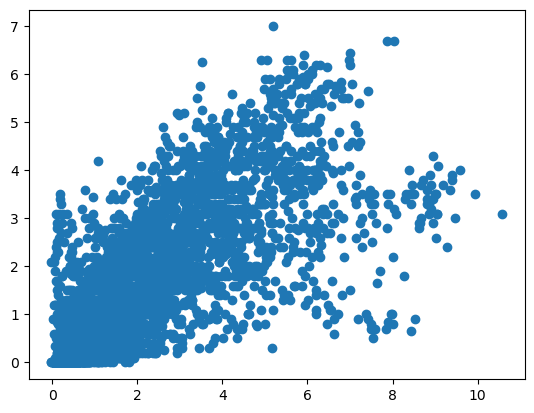

In [96]:
plt.scatter(df_all['In-situ'],df_all['WaPORv3L1'])

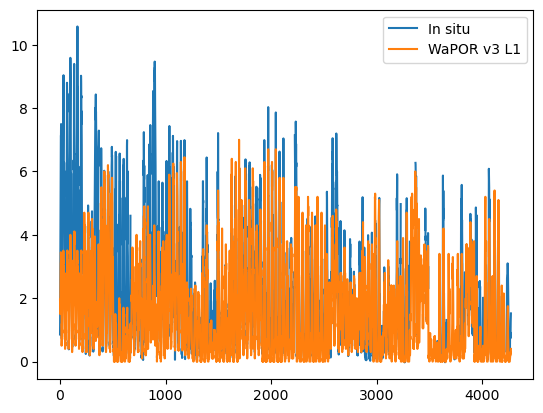

In [97]:
plt.plot(df_all.index,df_all['In-situ'],label='In situ')
plt.plot(df_all.index,df_all['WaPORv3L1'],label='WaPOR v3 L1')
plt.legend()

# Calculate performance metrics - all data points

In [98]:
import model_evaluation.double_collocation as dc
import model_evaluation.triple_collocation as tc

In [60]:
df_all = df_all.dropna() 
df_all

,Site ID,Date,In-situ,WaPORv3L1
0,US-ARM,2018-01-01,0.156499,0.0
1,US-ARM,2018-01-11,0.211633,0.1
2,US-ARM,2018-01-21,0.463622,0.6
3,US-ARM,2018-02-01,0.314572,0.2
4,US-ARM,2018-02-11,0.285557,0.5
...,...,...,...,...
1696,US-Sne,2019-11-11,2.219795,1.2
1697,US-Sne,2019-11-21,1.737908,0.9
1698,US-Sne,2019-12-01,0.885773,0.6
1699,US-Sne,2019-12-11,0.955440,0.6


In [70]:
ts0 = df_all['In-situ']
ts1 = df_all['WaPORv3L1']

In [71]:

mean_bias, mae, rmse = dc.error_metrics(ts0, ts1)
rmse_s, rmse_u = dc.rmse_wilmott_decomposition(ts0, ts1)
cor, p_value, slope, intercept, d = dc.agreement_metrics(ts0, ts1)

In [72]:
rmse

np.float64(1.466753190919213)

In [73]:
cor

np.float64(0.7457038545574628)

# Calculate performance metrics - per sites

In [ ]:
sites=list(df_all['Site ID'].unique())
sites

# Calculate performance metrics - per land cover type

In [99]:
metadata = pd.read_excel(r"E:\OpenET\flux_ET_dataset\fluxqaqc_station_metadata.xlsx",skiprows=1)
metadata

,Site ID,General classification,State,Data source/network,Period of record,Energy balance,Latitude,Longitude,Elevation (m),Land cover details,Land cover type,Measurement technique,Contact for sites not downloaded from AmeriFlux network,Contact email,DOI,Team member,Member role,Member institution,Member email,Site name
0,US-A32,Grasslands,OK,AmeriFlux,06/2015-06/2017,0.903129,36.819268,-97.819772,335.0,Hay pasture,Grasslands,Eddy covariance,NaN,NaN,10.17190/AMF/1436327,Lara Kueppers,PI,Lawrence Berkeley National Laboratory,lmkueppers@lbl.gov,ARM-SGP Medford hay pasture
1,US-A74,Croplands,OK,AmeriFlux,01/2016-10/2017,0.920941,36.808464,-97.548854,337.0,Sorghum,Annual crops,Eddy covariance,NaN,NaN,10.17190/AMF/1436328,Lara Kueppers,PI,Lawrence Berkeley National Laboratory,lmkueppers@lbl.gov,ARM SGP milo field
2,US-ADR,Shrublands,NV,AmeriFlux,05/2011-05/2017,0.919211,36.765278,-116.693333,842.0,Greasewood,Shrublands,Eddy covariance,NaN,NaN,10.17190/AMF/1418680,Michael Moreo,PI,U.S. Geological Survey,mtmoreo@usgs.gov,Amargosa Desert Research Site (ADRS)
3,US-AR1,Croplands,OK,AmeriFlux,06/2009-12/2012,1.089527,36.426700,-99.420000,611.0,Planted Switchgrass,Annual crops,Eddy covariance,NaN,NaN,10.17190/AMF/1246137,Dave Billesbach,PI,University of Nebraska,dbillesbach1@unl.edu,ARM USDA UNL OSU Woodward Switchgrass 1
4,US-ARb,Grasslands,OK,AmeriFlux,03/2005-10/2006,1.005785,35.549700,-98.040200,424.0,Native tallgrass prairie,Grasslands,Eddy covariance,NaN,NaN,10.17190/AMF/1246025,Margaret Torn,PI,Lawrence Berkeley National Laboratory,mstorn@lbl.gov,ARM Southern Great Plains burn site- Lamont
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,UOVLO,Shrublands,NV,USGS NWSC,07/1998-09/2000,NaN,37.045000,-116.709000,1177.0,Greasewood,Shrublands,Eddy covariance,Steve R. Reiner,srreiner@usgs.gov,10.3133/wri014239,NaN,NaN,NaN,NaN,NaN
157,UOVMD,Grasslands,NV,USGS NWSC,12/1998-09/2000,NaN,37.047000,-116.712000,1175.0,Salt Grass,Grasslands,Eddy covariance,Steve R. Reiner,srreiner@usgs.gov,10.3133/wri014239,NaN,NaN,NaN,NaN,NaN
158,UOVUP,Shrublands,NV,USGS NWSC,01/1998-09/2000,NaN,37.064000,-116.695000,1198.0,Wolfberry/Rabbitbrush,Shrublands,Eddy covariance,Steve R. Reiner,srreiner@usgs.gov,10.3133/wri014239,NaN,NaN,NaN,NaN,NaN
159,WRV_1,Shrublands,NV,USGS NWSC,09/2005-08/2007,0.994121,38.413600,-115.050900,1600.0,Greasewood,Shrublands,Eddy covariance,Michael T. Moreo,mtmoreo@usgs.gov,10.3133/sir20075078,NaN,NaN,NaN,NaN,NaN


In [100]:
LCCs = []
for i,row in df_all.iterrows():
    site = row['Site ID']
    LCC = metadata[metadata['Site ID']==site]['Land cover type'].values[0]
    LCCs.append(LCC)
df_all['LCC']=LCCs

In [101]:
LCCs=list(df_all['LCC'].unique())
LCCs

['Annual crops',
 'Orchards',
 'Vineyards',
 'Vegetable crops',
 'Riparian',
 'Evergreen Forests',
 'Grasslands',
 'Shrublands',
 'Mixed Forests',
 'Wetlands']

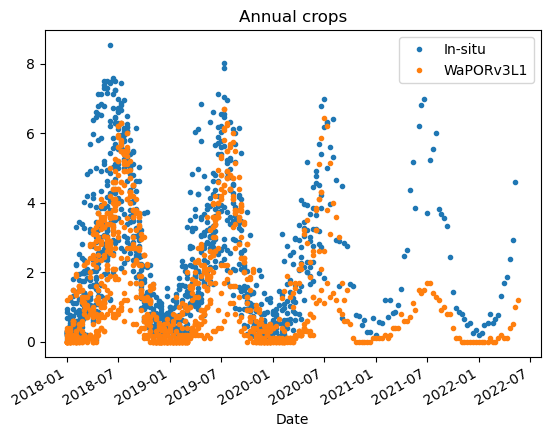

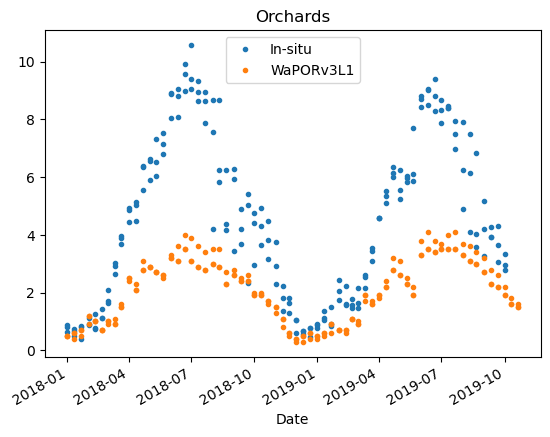

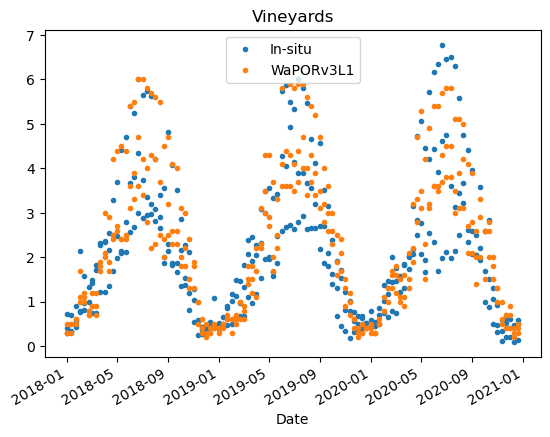

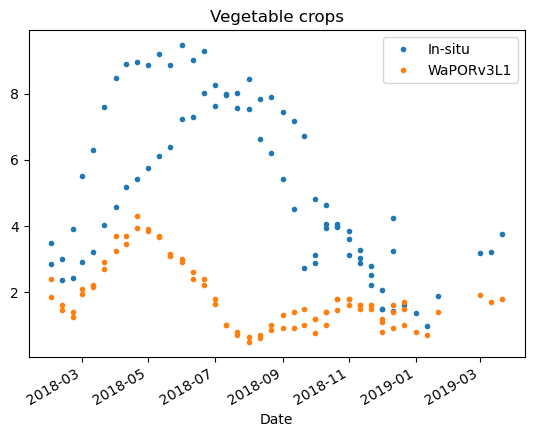

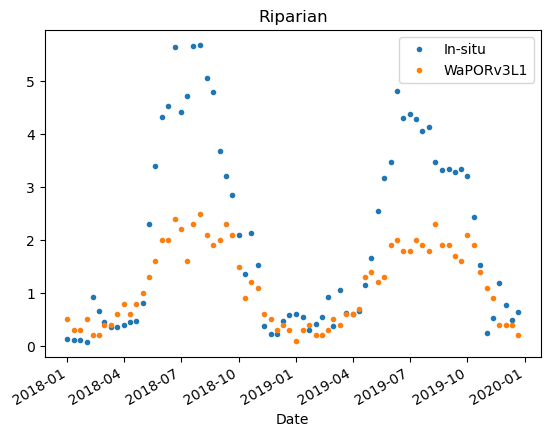

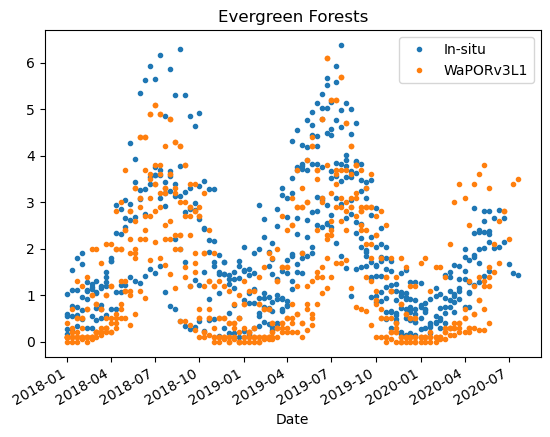

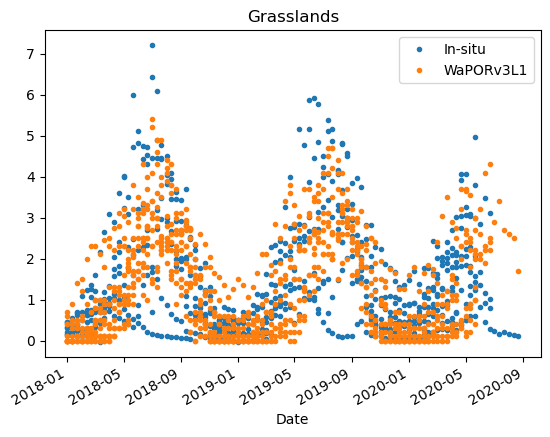

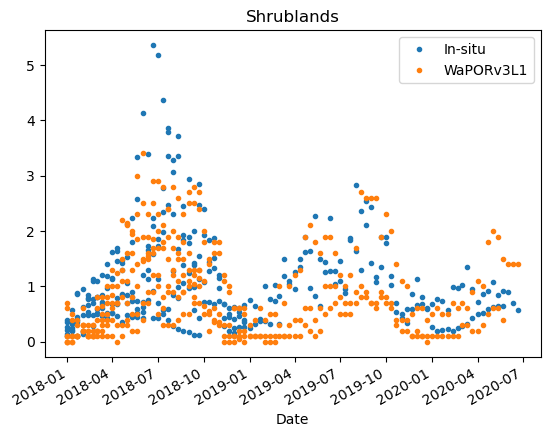

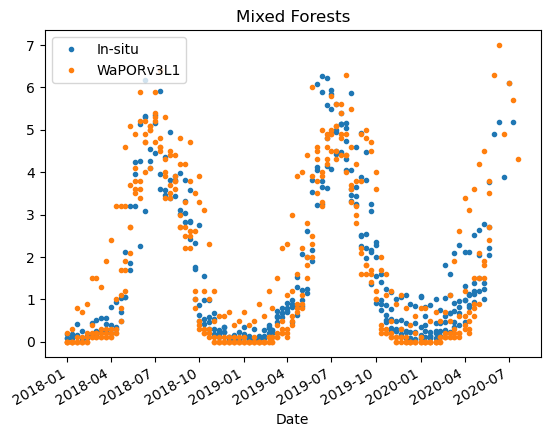

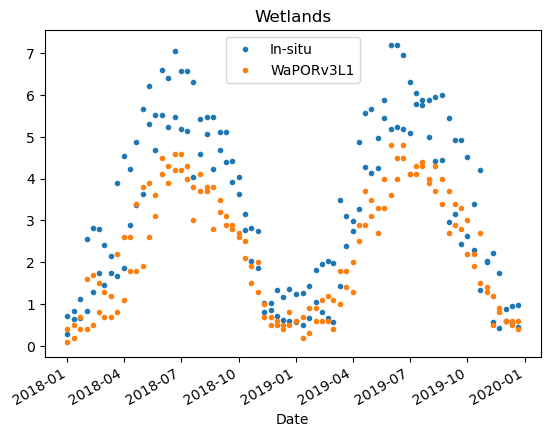

In [102]:
metrics = {'LCC':[],
          'rmse':[],
           'cor':[]
          }
for LCC in LCCs:
    df_site = df_all[df_all['LCC']==LCC]
    df_site.plot(x='Date',style='.')
    plt.title(LCC)    
    metrics['LCC']+=[LCC]
    ts0 = df_site['In-situ']
    ts1 = df_site['WaPORv3L1']
    mean_bias, mae, rmse = dc.error_metrics(ts0, ts1)
    rmse_s, rmse_u = dc.rmse_wilmott_decomposition(ts0, ts1)
    cor, p_value, slope, intercept, d = dc.agreement_metrics(ts0, ts1)
    metrics['rmse']+=[rmse_u]
    metrics['cor']+=[cor]

In [103]:
pd.DataFrame(metrics)

,LCC,rmse,cor
0,Annual crops,1.072583,0.767862
1,Orchards,0.459723,0.905302
2,Vineyards,0.577381,0.933820
3,Vegetable crops,0.885184,0.378388
4,Riparian,0.299869,0.912996
5,Evergreen Forests,0.878399,0.797054
6,Grasslands,0.835815,0.744281
7,Shrublands,0.561936,0.674107
8,Mixed Forests,0.557777,0.955563
9,Wetlands,0.346181,0.970036


In [104]:
pd.DataFrame(metrics).to_csv('Data/DC_dekad.csv')